# Import Important libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# What is Matplotlib
# Matplotlib is a low level graph plotting library in python

# Read the data

In [67]:
ds=pd.read_csv('car.csv') # read the data
ds.head(10) # print the first 10 rows

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,BMW,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000
1,Honda,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000
2,Toyota,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,158000
3,Ford,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,225000
4,Honda,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,130000
5,BMW,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0,440000
6,Nissan,2007,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.50,5.0,96000
7,Ford,2001,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,4.0,45000
8,Ford,2011,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,5.0,350000
9,Honda,2013,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,5.0,200000


# Split data to Features(x) and label(y)

In [68]:
x=ds.iloc[:,:-1].values # Features --> read all rows for all cols except the last one (label)
y=ds.iloc[:,-1].values  # label ---> read all rows for the last col (label)

# Take care of Missing data

In [69]:
from sklearn.impute import SimpleImputer
missing_cols=range(7,11) # cols that have missing values
most_freq_imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
most_freq_imputer.fit(x[:,missing_cols])  # run imputer using fit method
x[:,missing_cols]=most_freq_imputer.transform(x[:,missing_cols])  # replace old data with new !

ds.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,BMW,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000
1,Honda,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000
2,Toyota,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,158000
3,Ford,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,225000
4,Honda,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,130000


# Encoding the Independent Variable

In [70]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

category_cols = [0, 3, 4, 5, 6]
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), category_cols)], remainder='passthrough') # !!!!??
x = np.array(ct.fit_transform(x)) # run to apper the affect on data
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2014,145500,23.4,1248.0,74.0,5.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2014,120000,21.14,1498.0,103.52,5.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,2006,140000,17.7,1497.0,78.0,5.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2010,127000,23.0,1396.0,90.0,5.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2007,120000,16.1,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2013,110000,18.5,1197.0,82.85,5.0
8124,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2007,119000,16.8,1493.0,110.0,5.0
8125,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2009,120000,19.3,1248.0,73.9,5.0
8126,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2013,25000,23.57,1396.0,70.0,5.0


# Splitting the dataset into training set and test set

In [71]:
x.shape

(8128, 25)

In [72]:
y.shape

(8128,)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [74]:
print("Trainig Data..")
print("training features: ", X_train.shape)
print("training labels: ", y_train.shape)

Trainig Data..
training features:  (6502, 25)
training labels:  (6502,)


In [75]:
print("Testing Data..")
print("Testing features: ", X_test.shape)
print("Testing labels: ", y_test.shape)

Testing Data..
Testing features:  (1626, 25)
Testing labels:  (1626,)


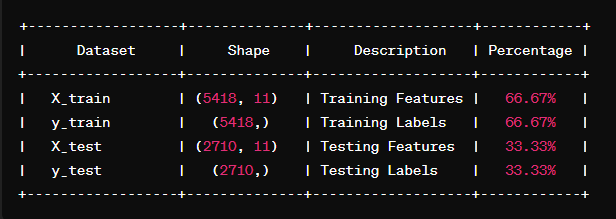

In [76]:
from sklearn.linear_model import LinearRegression
model =LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [77]:
training_acc=np.ceil(model.score(X_train,y_train)*100)
print("The Training Accuracy = ", training_acc, "%")

The Training Accuracy =  70.0 %


In [78]:
testing_acc=np.ceil(model.score(X_test,y_test)*100)
print("The Testing Accuracy = ", testing_acc, "%")

The Testing Accuracy =  64.0 %


## Visualising the Training set results

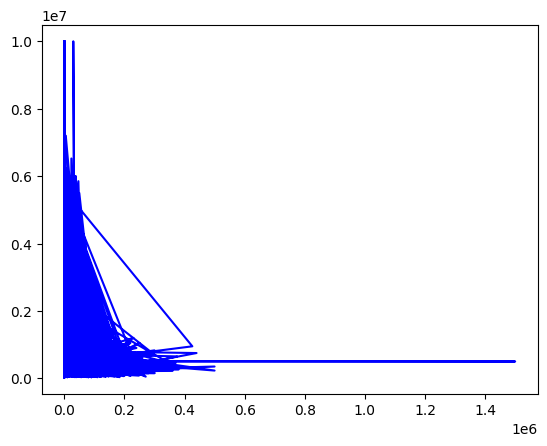

In [84]:
xtrain = np.array(X_train)
ytrain = np.array(y_train)

xtest = np.array(X_test)
ytest = np.array(y_test)

plt.plot(xtrain, ytrain, color='blue')


plt.show()


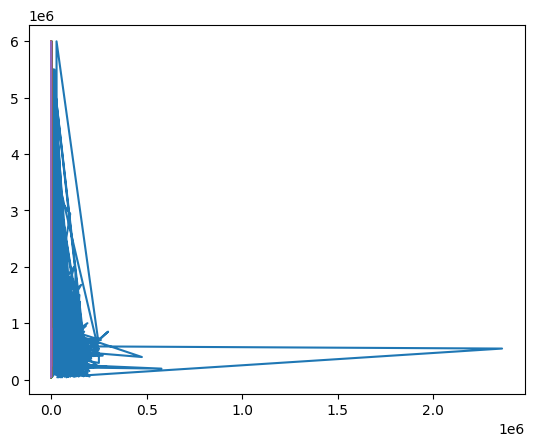

In [87]:
plt.plot(xtest, ytest)
plt.show()